In [1]:
%reset -f

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


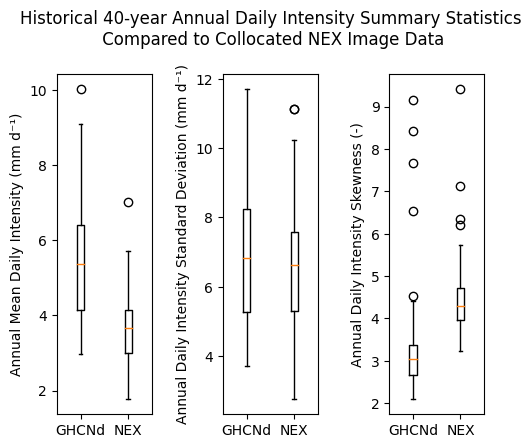

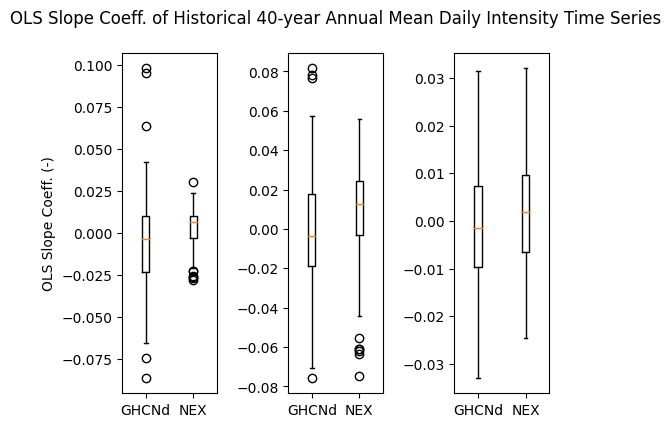

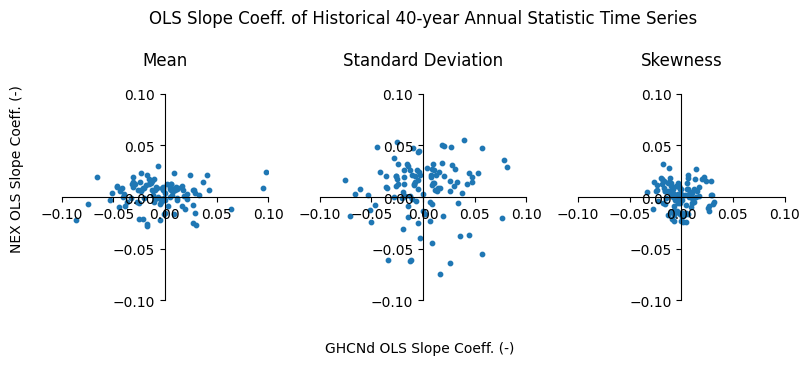

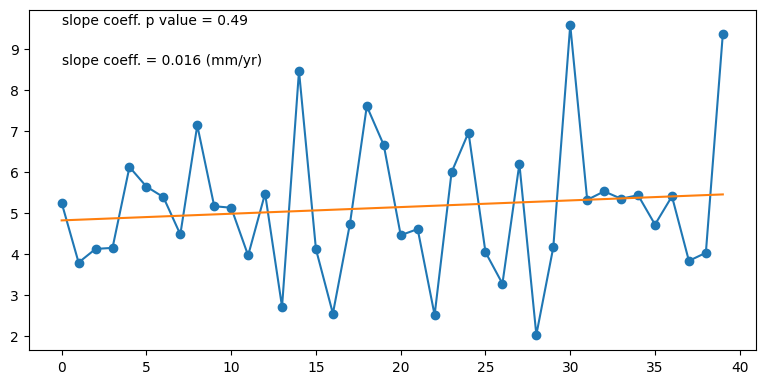

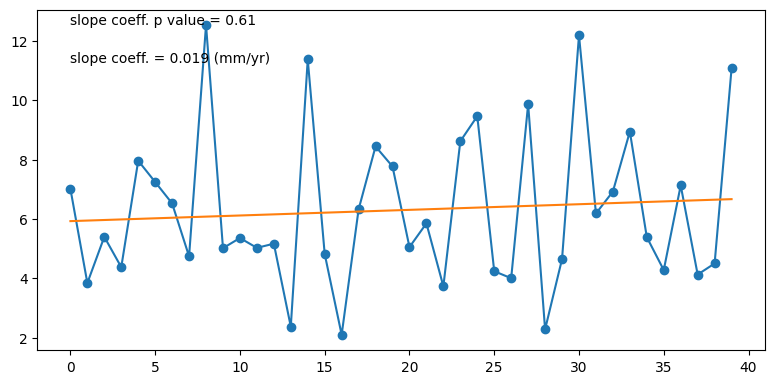

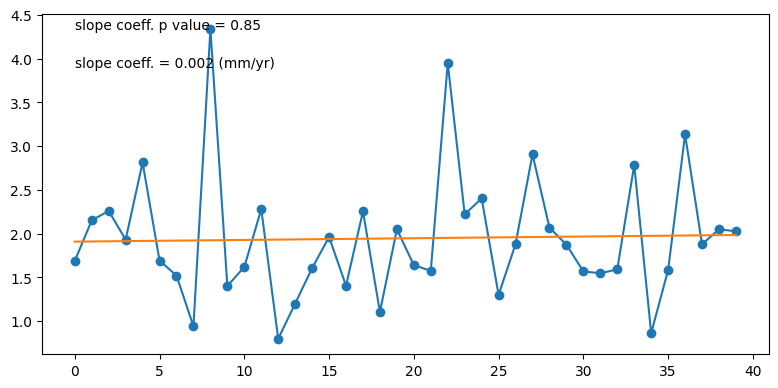

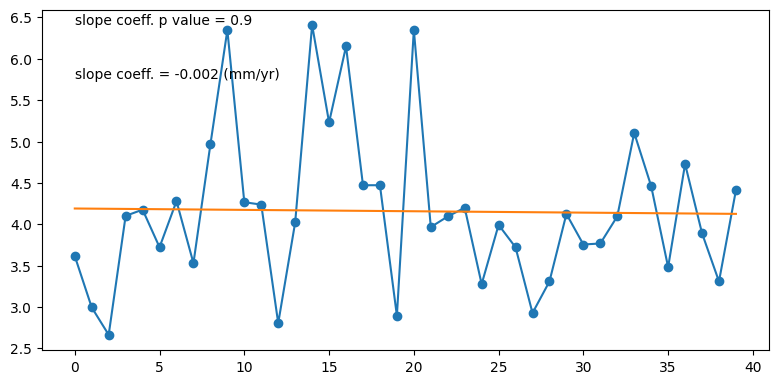

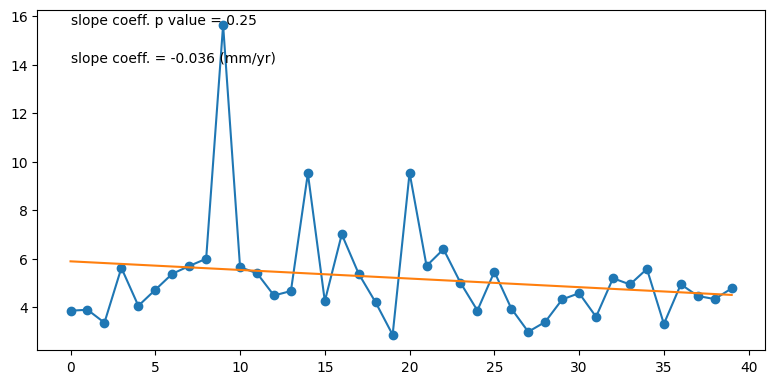

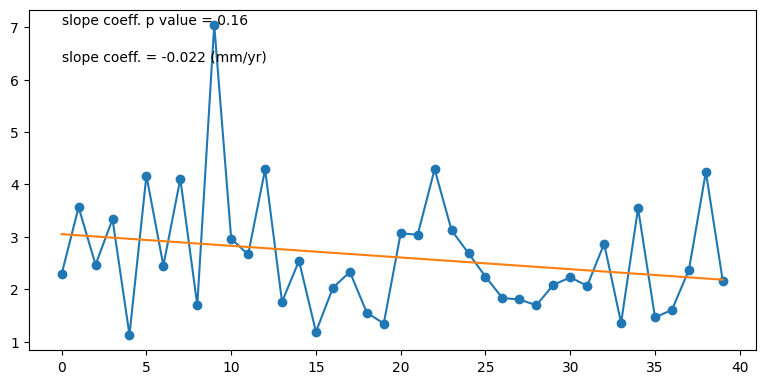

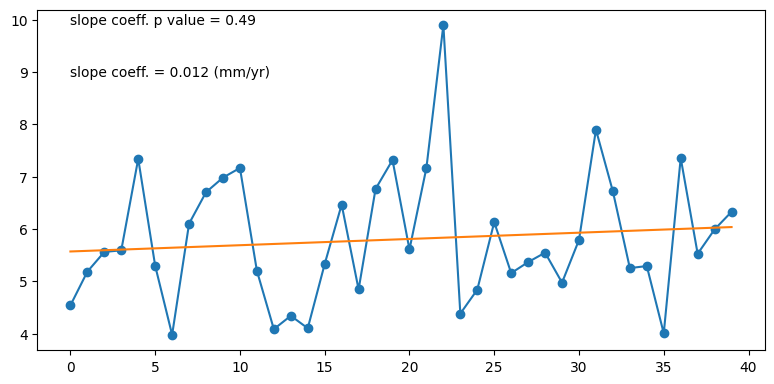

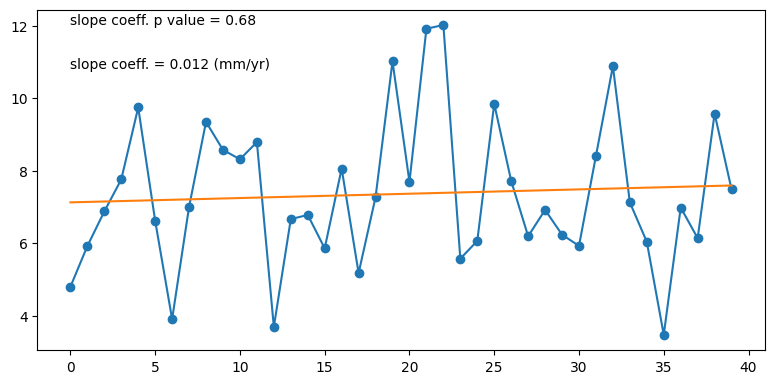

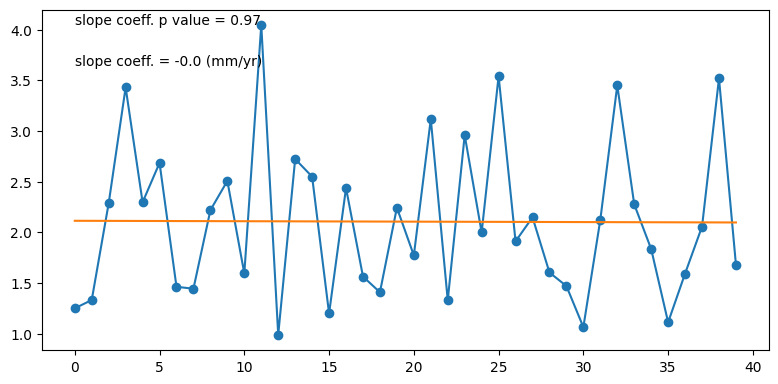

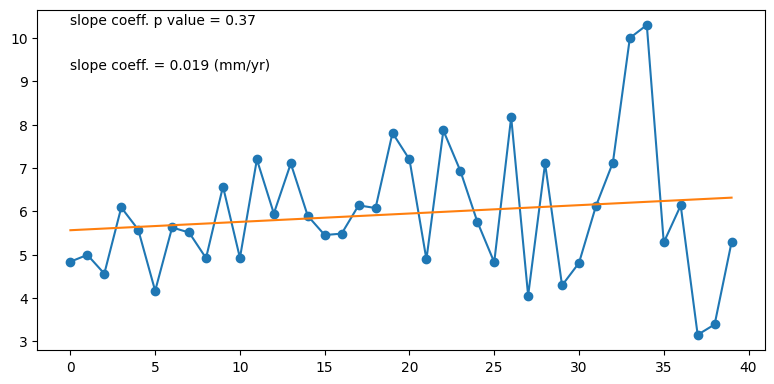

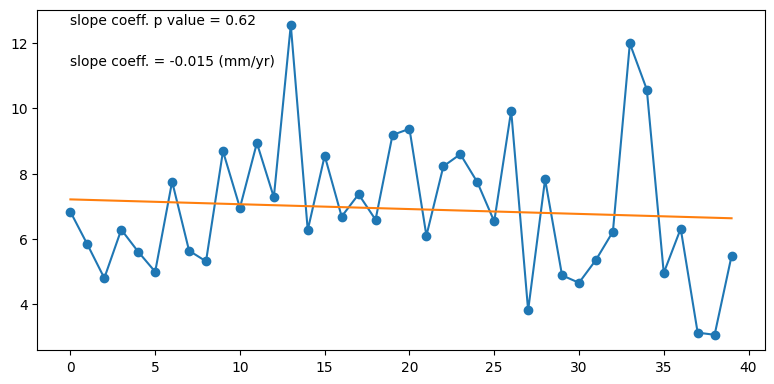

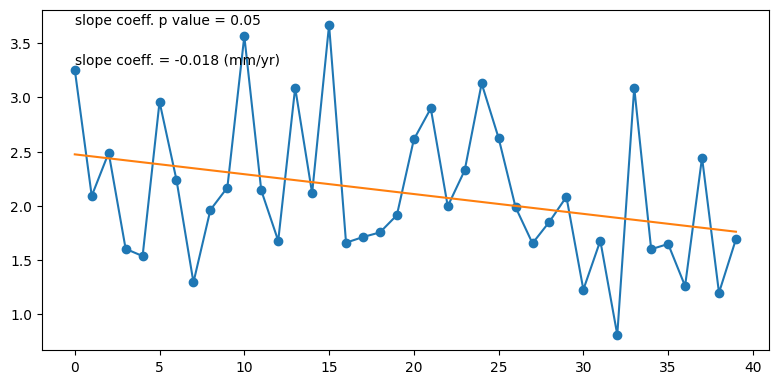

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import scipy as scipy
import numpy as np
import os

ghcnresFILE = '/content/drive/My Drive/Colab Notebooks/Script Input Files/GHCN_Historical_Annual_Mean_MEANP_Trends_Results.csv'
nexresFILE = '/content/drive/My Drive/Colab Notebooks/Script Input Files/NEX_Historical_Annual_Mean_MEANP_Trends_Results.csv'
ghcndatFILE = '/content/drive/My Drive/Colab Notebooks/Script Input Files/GHCN_Historical_Annual_Mean_MEANP_Trends_Data.csv'
nexdatFILE = '/content/drive/My Drive/Colab Notebooks/Script Input Files/NEX_Historical_Annual_Mean_MEANP_Trends_Data.csv'



with open(ghcnresFILE) as f:
  lines = f.readlines()

ghcn_res = []
for line in lines[1:]:
  row = line.strip('\n').split(',')
  stationID = row[0]
  x = float(row[1])
  y = float(row[2])
  slope_means = float(row[3])
  mean = float(row[4])
  slope_sdevs = float(row[5])
  sdev = float(row[6])
  slope_skews = float(row[7])
  skew = float(row[8])
  ghcn_res.append([stationID, x, y, mean, sdev, skew, slope_means, slope_sdevs, slope_skews])

with open(nexresFILE) as f:
  lines = f.readlines()

nex_res = []
for line in lines[1:]:
  row = line.strip('\n').split(',')
  stationID = row[0]
  x = float(row[1])
  y = float(row[2])
  slope_means = float(row[3])
  mean = float(row[4])
  slope_sdevs = float(row[5])
  sdev = float(row[6])
  slope_skews = float(row[7])
  skew = float(row[8])
  nex_res.append([stationID, x, y, mean, sdev, skew, slope_means, slope_sdevs, slope_skews])



ghcn_means = [row[3] for row in ghcn_res]
outlier_indices = [i for i, num in enumerate(ghcn_means) if num < 40]
ghcn_means = [ghcn_res[i][3] for i in outlier_indices]
nex_means = [nex_res[i][3] for i in outlier_indices]

ghcn_sdevs = [row[4] for row in ghcn_res]
outlier_indices = [i for i, num in enumerate(ghcn_sdevs) if num < 30]
ghcn_sdevs = [ghcn_res[i][4] for i in outlier_indices]
nex_sdevs = [nex_res[i][4] for i in outlier_indices]

ghcn_skews = [row[5] for row in ghcn_res]
outlier_indices = [i for i, num in enumerate(ghcn_skews) if num < 10]
ghcn_skews = [ghcn_res[i][5] for i in outlier_indices]
nex_skews = [nex_res[i][5] for i in outlier_indices]



fig, ax = plt.subplots(1, 3, figsize=(5, 4))
fig.tight_layout()
plt.subplots_adjust(wspace = 0.75)

ax[0].boxplot([ghcn_means, nex_means])
ax[0].set_ylabel('Annual Mean Daily Intensity (mm d⁻¹)')
ax[0].set_xticks([1, 2], ['GHCNd', 'NEX'])

ax[1].set_title('Historical 40-year Annual Daily Intensity Summary Statistics\n Compared to Collocated NEX Image Data\n')
ax[1].boxplot([ghcn_sdevs, nex_sdevs])
ax[1].set_ylabel('Annual Daily Intensity Standard Deviation (mm d⁻¹)')
ax[1].set_xticks([1, 2], ['GHCNd', 'NEX'])

ax[2].boxplot([ghcn_skews, nex_skews])
ax[2].set_ylabel('Annual Daily Intensity Skewness (-)')
ax[2].set_xticks([1, 2], ['GHCNd', 'NEX'])

plt.show()



ghcn_means = [row[3] for row in ghcn_res]
outlier_indices = [i for i, num in enumerate(ghcn_means) if num < 40]
ghcn_slope_means = [ghcn_res[i][6] for i in outlier_indices]
nex_slope_means = [nex_res[i][6] for i in outlier_indices]

ghcn_sdevs = [row[4] for row in ghcn_res]
outlier_indices = [i for i, num in enumerate(ghcn_sdevs) if num < 30]
ghcn_slope_sdevs = [ghcn_res[i][7] for i in outlier_indices]
nex_slope_sdevs = [nex_res[i][7] for i in outlier_indices]

ghcn_skews = [row[5] for row in ghcn_res]
outlier_indices = [i for i, num in enumerate(ghcn_skews) if num < 10]
ghcn_slope_skews = [ghcn_res[i][8] for i in outlier_indices]
nex_slope_skews = [nex_res[i][8] for i in outlier_indices]



fig, ax = plt.subplots(1, 3, figsize=(5, 4))
fig.tight_layout()
plt.subplots_adjust(wspace = 0.75)

ax[0].boxplot([ghcn_slope_means, nex_slope_means])
ax[0].set_ylabel('OLS Slope Coeff. (-)')
ax[0].set_xticks([1, 2], ['GHCNd', 'NEX'])

ax[1].boxplot([ghcn_slope_sdevs, nex_slope_sdevs])
ax[1].set_title('OLS Slope Coeff. of Historical 40-year Annual Mean Daily Intensity Time Series\n')
ax[1].set_xticks([1, 2], ['GHCNd', 'NEX'])

ax[2].boxplot([ghcn_slope_skews, nex_slope_skews])
ax[2].set_xticks([1, 2], ['GHCNd', 'NEX'])

plt.show()



fig, ax = plt.subplots(1, 3, figsize=(8, 4))
fig.tight_layout()
plt.subplots_adjust(wspace = 0.25)

ax[0].set_title('\nMean\n')
ax[0].text(-0.15, -0.05, 'NEX OLS Slope Coeff. (-)', rotation=90)
ax[0].scatter(ghcn_slope_means, nex_slope_means, s=10)
ax[0].spines['left'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].yaxis.tick_left()
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['top'].set_color('none')
ax[0].set_aspect('equal')
ax[0].set_xlim(-0.1, 0.1)
ax[0].set_ylim(-0.1, 0.1)

ax[1].set_title('OLS Slope Coeff. of Historical 40-year Annual Statistic Time Series\n\nStandard Deviation\n')
ax[1].text(-0.095, -0.15, 'GHCNd OLS Slope Coeff. (-)')
ax[1].scatter(ghcn_slope_sdevs, nex_slope_sdevs, s=10)
ax[1].spines['left'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].yaxis.tick_left()
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['top'].set_color('none')
ax[1].set_aspect('equal')
ax[1].set_xlim(-0.1, 0.1)
ax[1].set_ylim(-0.1, 0.1)

ax[2].set_title('\nSkewness\n')
ax[2].scatter(ghcn_slope_skews, nex_slope_skews, s=10)
ax[2].spines['left'].set_position('zero')
ax[2].spines['right'].set_color('none')
ax[2].yaxis.tick_left()
ax[2].spines['bottom'].set_position('zero')
ax[2].spines['top'].set_color('none')
ax[2].set_aspect('equal')
ax[2].set_xlim(-0.1, 0.1)
ax[2].set_ylim(-0.1, 0.1)

plt.show()


ghcn_data_df = pd.read_csv(ghcndatFILE)
next_data_df = pd.read_csv(nexdatFILE)

for col in ghcn_data_df.columns[1:13]:

  fig, ax = plt.subplots(figsize=(8, 4))
  fig.tight_layout()

  ax.plot(list(range(0, len(ghcn_data_df[col]))), ghcn_data_df[col])
  ax.scatter(list(range(0, len(ghcn_data_df[col]))), ghcn_data_df[col])

  y = ghcn_data_df[col]
  x = np.arange(0, len(ghcn_data_df[col]))
  X = sm.add_constant(x)
  model = sm.OLS(y, X)
  results = model.fit()
  slope = results.params[1]
  intc = results.params[0]
  slope_coeff_p = round(results.pvalues[1], 2)
  ax.text(0, max(y), 'slope coeff. p value = ' + str(slope_coeff_p))
  ax.text(0, 0.9*max(y), 'slope coeff. = {} (mm/yr)'.format(str(round(slope, 3))))
  ax.plot([0, max(x)], [intc, (slope)*(max(x)) + intc])

